In [1]:
import pandas as pd
import numpy as np

In [2]:
hospital=pd.read_csv("C:\\Users\\HP\\Desktop\\Course\\Datas\\Hospital.csv")

In [3]:
hospital.head(10)

,RNo,BodyWeight,CostofTreatment,LNY
0,1,32.0,148652.00,11.9094
1,2,32.0,128104.37,11.7606
2,3,33.0,133087.00,11.7988
3,4,35.0,124804.00,11.7345
4,5,36.0,199790.00,12.2050
5,6,36.0,147021.00,11.8983
6,7,36.0,135216.00,11.8146
7,8,37.0,166709.00,12.0240
8,9,37.0,123187.90,11.7215
9,10,40.0,233266.00,12.3599


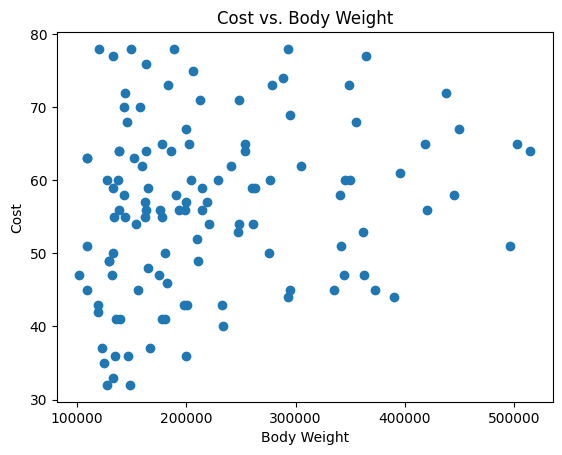

In [4]:
import matplotlib.pyplot as plt

plt.scatter(hospital.CostofTreatment, hospital.BodyWeight)
plt.title('Cost vs. Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Cost')
plt.show()

In [5]:
hospital.describe()

,RNo,BodyWeight,CostofTreatment,LNY
count,120.000000,120.000000,120.000000,120.000000
mean,60.500000,56.233333,221910.092667,12.224520
std,34.785054,11.587978,98065.496352,0.405269
min,1.000000,32.000000,102537.850000,11.538000
25%,30.750000,47.000000,144109.807500,11.878325
50%,60.500000,56.500000,192365.500000,12.167150
75%,90.250000,64.000000,276030.500000,12.528300
max,120.000000,78.000000,514524.000000,13.151000


<Axes: >

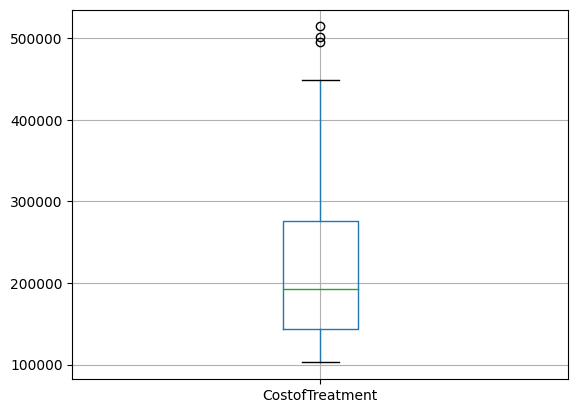

In [6]:
hospital.boxplot(column=['CostofTreatment'])

In [7]:
import statsmodels.api as sm

#define response variable
y = hospital['CostofTreatment']

#define explanatory variable
x = hospital[['BodyWeight']]

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        CostofTreatment   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.835
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0298
Time:                        11:08:21   Log-Likelihood:                -1546.6
No. Observations:                 120   AIC:                             3097.
Df Residuals:                     118   BIC:                             3103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.275e+05   4.38e+04      2.909      0.0

In [8]:
print(model.params)

const         127498.079394
BodyWeight      1678.933253
dtype: float64


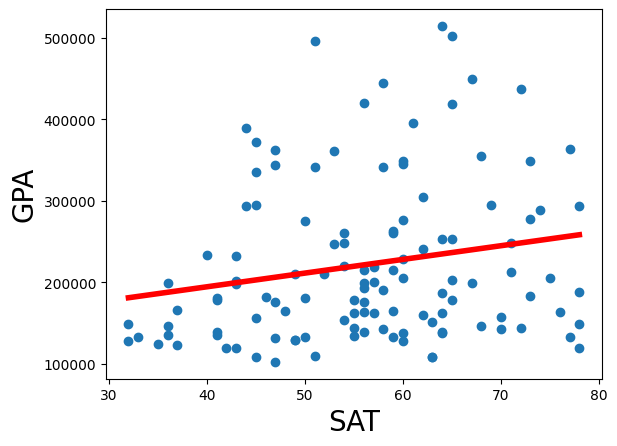

In [9]:
plt.scatter(x,y) 
yhat= 1678.97*x + 127498 
fig = plt.plot(x,yhat,lw=4,c='red', label = 'regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X, test_X, train_y, test_y=train_test_split(X,y,train_size=0.8, random_state=100)

In [12]:
model=sm.OLS(test_y, test_X ).fit()

In [13]:
#model.params

In [14]:
import seaborn as sn
%matplotlib inline

<Figure size 1000x800 with 0 Axes>

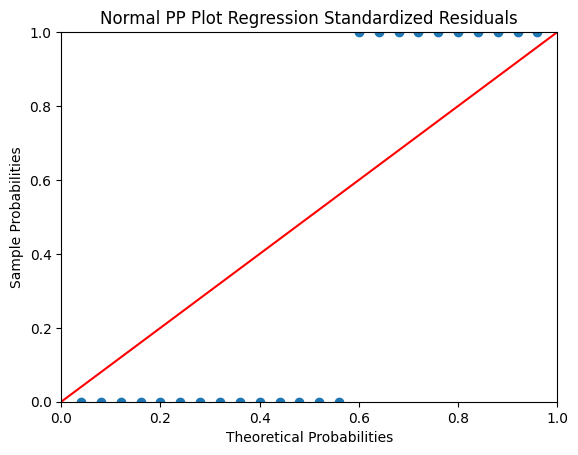

In [15]:
hospital_residuals=model.resid
probplot=sm.ProbPlot(hospital_residuals)
plt.figure( figsize= (10,8))
probplot.ppplot( line='45')
plt.title("Normal PP Plot Regression Standardized Residuals")
plt.show()

In [16]:
from scipy.stats import zscore

In [17]:
hospital['z_score_cost'] = zscore(hospital.CostofTreatment )

In [18]:
print(hospital['z_score_cost'])

0     -0.750165
1     -0.960573
2     -0.909550
3     -0.994369
4     -0.226510
         ...   
115   -0.909110
116    0.729263
117   -0.338802
118   -0.741870
119   -1.042220
Name: z_score_cost, Length: 120, dtype: float64


Text(0, 0.5, 'Cooks Distance')

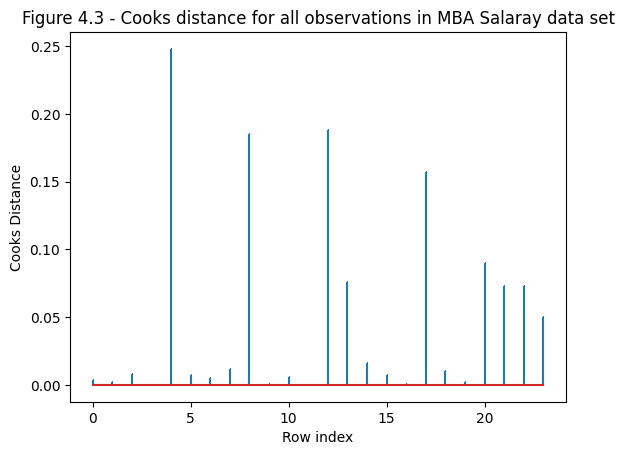

In [19]:
import numpy as np
model_influence = model.get_influence()
(c, p) = model_influence.cooks_distance
plt.stem( np.arange( len( test_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance")

In [20]:
cooks = model_influence.cooks_distance

In [21]:
mean_cooks = np.mean(cooks[0])
mean_cooks

0.050975283665435134

In [22]:
pred_y = model.predict( test_X)

In [23]:
pred_y

69     252655.060362
54     243941.372671
37     226513.997289
46     238132.247544
106    290414.373690
26     214895.747034
116    307841.749072
57     243941.372671
21     211991.184471
33     223609.434725
11     200372.934216
68     252655.060362
97     275891.560872
25     211991.184471
32     220704.872162
80     261368.748053
101    281700.685999
110    293318.936254
29     217800.309598
45     238132.247544
28     217800.309598
91     267177.873181
90     267177.873181
43     235227.684980
dtype: float64

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
np.abs(mean_absolute_percentage_error(test_y, pred_y))

0.3147540809026261